# Anwendung und Vergleich von Machine Learning und Deep Learning Algorithmen zur Vorhersage von COVID-19 Kennzahlen

## Einführung
Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

## Explorative Datenanalyse
Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

### Imports

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Parsing der Daten

In [62]:
# Read in CSV file
df = pd.read_csv('../data/stripped_data/all_data.csv', sep=',')

In [64]:
# Verify shape of dataframe
df.shape

(662, 14)

In [65]:
# Show first 5 lines of dataframe
df.head(n=5)

,datum,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hospitalisation,hosp_capacity_icu_covid,hosp_capacity_total_covid,death
0,2020-02-24,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,0
1,2020-02-25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,0
2,2020-02-26,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,0
3,2020-02-27,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,0
4,2020-02-28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,0


In [66]:
# Show last 5 lines of dataframe
df.tail(n=5)

,datum,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hospitalisation,hosp_capacity_icu_covid,hosp_capacity_total_covid,death
657,2021-12-12,4378,977.0,14179.0,532.0,445.0,96802.0,5507.0,29259.0,62036.0,75,279.0,1605.0,23
658,2021-12-13,12320,4693.0,61321.0,5099.0,-406.0,162533.0,11292.0,54591.0,96650.0,93,303.0,1758.0,18
659,2021-12-14,9943,4544.0,70722.0,4344.0,200.0,204909.0,12322.0,70720.0,121867.0,50,289.0,1683.0,22
660,2021-12-15,5226,4843.0,69503.0,5349.0,-506.0,208149.0,12679.0,75639.0,119831.0,16,296.0,1650.0,6
661,2021-12-16,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0


In [67]:
# Last row is not complete --> drop it
df = df[:-1]

In [68]:
# Check data types of features
df.dtypes

datum                                 object
cases                                  int64
vaccination_atLeastOneDosePersons    float64
vaccination_firstBoosterPersons      float64
vaccination_fullyVaccPersons         float64
vaccination_partiallyVaccPersons     float64
certificate_all                      float64
certificate_recovered                float64
certificate_tested                   float64
certificate_vacinated                float64
hospitalisation                        int64
hosp_capacity_icu_covid              float64
hosp_capacity_total_covid            float64
death                                  int64
dtype: object

In [69]:
# The feature "Datum" is of type object. This can be converted to datatime.
df['datum'] = pd.to_datetime(df['datum'], errors='coerce')

In [70]:
df.dtypes

datum                                datetime64[ns]
cases                                         int64
vaccination_atLeastOneDosePersons           float64
vaccination_firstBoosterPersons             float64
vaccination_fullyVaccPersons                float64
vaccination_partiallyVaccPersons            float64
certificate_all                             float64
certificate_recovered                       float64
certificate_tested                          float64
certificate_vacinated                       float64
hospitalisation                               int64
hosp_capacity_icu_covid                     float64
hosp_capacity_total_covid                   float64
death                                         int64
dtype: object

In [71]:
# All the other features are either of type float64 or int64. As these COVID-19 numbers must be whole-number, we can convert all these features to int64.
numerical_cols = ['cases',
'vaccination_atLeastOneDosePersons',
'vaccination_firstBoosterPersons',
'vaccination_fullyVaccPersons',
'vaccination_partiallyVaccPersons',
'certificate_all',
'certificate_recovered',
'certificate_tested',
'certificate_vacinated',
'hospitalisation',
'hosp_capacity_icu_covid',
'hosp_capacity_total_covid',
'death'
]

# Here, we have a problem to convert the columns from np.float64 to np.int64 as there are lots of NA values in the dataset.
df[numerical_cols] = df[numerical_cols].astype(np.int64)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

### Explorative Datenanalyse und Datenbereinigung

#### Duplicates

In [72]:
# There are no duplicates in the dataset. So, we don't have to drop any rows.
df.duplicated().any()

False

#### Null Values

In [73]:
# We see that in most of the columns there are null values.
df.isna().any()

datum                                False
cases                                False
vaccination_atLeastOneDosePersons     True
vaccination_firstBoosterPersons       True
vaccination_fullyVaccPersons          True
vaccination_partiallyVaccPersons      True
certificate_all                       True
certificate_recovered                 True
certificate_tested                    True
certificate_vacinated                 True
hospitalisation                      False
hosp_capacity_icu_covid               True
hosp_capacity_total_covid             True
death                                False
dtype: bool

In [74]:
df.isnull().sum()

datum                                  0
cases                                  0
vaccination_atLeastOneDosePersons    301
vaccination_firstBoosterPersons      301
vaccination_fullyVaccPersons         301
vaccination_partiallyVaccPersons     301
certificate_all                      469
certificate_recovered                469
certificate_tested                   469
certificate_vacinated                469
hospitalisation                        0
hosp_capacity_icu_covid               36
hosp_capacity_total_covid             36
death                                  0
dtype: int64

Im Buch von Aileen Nielsen [1] werden drei verschiedene Methoden behandelt, um mit fehlenden Daten umzugehen:
1. Löschen der Datenpunkte
Datenpunkte, die fehlende Werte für gewisse Features aufweisen, werden gelöscht und aus dem Datensatz entfernt.
2. Imputation
Einfüllen der fehlenden Werte basierend auf Daten stammmend aus dem gesamten Datenset.
3. Interpolation
Interpolation ist eine Form von Inputation. Dabei werden die fehlenden Daten basierend auf ihren Nachbarn aufgefüllt.

Wenn man das COVID-19 Datenset genauer betrachtet, fällt auf, dass die fehlenden Werte nicht auf einen Messfehler zurückzuführen sind. Der Grund liegt darin, dass nicht alle Messwerte von Anfang an aufgezeichnet wurden. 

##### Features betreffend Impfung (vaccination_atLeastOneDosePersons, vaccination_firstBoosterPersons, vaccination_fullyVaccPersons, vaccination_partiallyVaccPersons)
Die Zahlen betreffend die Impfungen wurden erst ab dem 21.12.2020 erfasst, da sich vorher noch niemand gegen COVID-19 impfen konnte. Daraus resultieren die 302 fehlenden Werte pro Feature.
Es bietet sich an, diese 'NaN' Werte mit '0' zu ersetzen.

In [75]:
# Find all NaN Values for 'vaccination_atLeastOneDosePersons'
indices = list(df.loc[pd.isna(df['vaccination_atLeastOneDosePersons']), :].index)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [76]:
df['vaccination_atLeastOneDosePersons'] = df['vaccination_atLeastOneDosePersons'].fillna(0)

In [78]:
# Find all NaN Values for 'vaccination_firstBoosterPersons'
indices = list(df.loc[pd.isna(df['vaccination_firstBoosterPersons']), :].index)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [79]:
df['vaccination_firstBoosterPersons'] = df['vaccination_firstBoosterPersons'].fillna(0)

In [80]:
# Find all NaN Values for 'vaccination_fullyVaccPersons'
indices = list(df.loc[pd.isna(df['vaccination_fullyVaccPersons']), :].index)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [81]:
df['vaccination_fullyVaccPersons'] = df['vaccination_fullyVaccPersons'].fillna(0)

In [82]:
# Find all NaN Values for 'vaccination_partiallyVaccPersons'
indices = list(df.loc[pd.isna(df['vaccination_partiallyVaccPersons']), :].index)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [83]:
df['vaccination_partiallyVaccPersons'] = df['vaccination_partiallyVaccPersons'].fillna(0)

In [84]:
df.head(n=5)

,datum,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hospitalisation,hosp_capacity_icu_covid,hosp_capacity_total_covid,death
0,2020-02-24,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,5,NaN,NaN,0
1,2020-02-25,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,4,NaN,NaN,0
2,2020-02-26,10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,9,NaN,NaN,0
3,2020-02-27,10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,5,NaN,NaN,0
4,2020-02-28,10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,5,NaN,NaN,0


##### Features betreffend Zertifikat (certificate_all, certificate_recovered, certificate_tested, certificate_vacinated)
Bei all diesen Features sind offensichtlich 470 fehlende Werte vorhanden. Dies hat ebenfalls den Grund, dass Zertifikate nicht von Beginn der Pandemie an ausgestellt wurden. Also entsprechen die 'NaN' Werte ebenfalls dem Wert '0'.

In [85]:
# Find all NaN Values for 'certificate_all'
indices = list(df.loc[pd.isna(df['certificate_all']), :].index)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [86]:
df['certificate_all'] = df['certificate_all'].fillna(0)

In [87]:
# Find all NaN Values for 'certificate_recovered'
indices = list(df.loc[pd.isna(df['certificate_recovered']), :].index)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [88]:
df['certificate_recovered'] = df['certificate_recovered'].fillna(0)

In [89]:
# Find all NaN Values for 'certificate_tested'
indices = list(df.loc[pd.isna(df['certificate_tested']), :].index)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [90]:
df['certificate_tested'] = df['certificate_tested'].fillna(0)

In [91]:
# Find all NaN Values for 'certificate_vacinated'
indices = list(df.loc[pd.isna(df['certificate_vacinated']), :].index)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [92]:
df['certificate_vacinated'] = df['certificate_vacinated'].fillna(0)

##### Features betreffend Spitalkapazitäten (hosp_capacity_icu_covid und hosp_capacity_total_covid)
Diese beiden Features beinhalten je 37 fehlende Werte.

In [93]:
index = []
index = list(df.loc[pd.isna(df['hosp_capacity_icu_covid']), :].index)
print(index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 434]


In [94]:
index = []
index = list(df.loc[pd.isna(df['hosp_capacity_total_covid']), :].index)
print(index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 434]


Man kann sehen, dass die ersten 35 Werte fehlen. Lässt man sich jedoch den nächsten Datenpunkt anzeigen, sind folgende Werte vorhanden:
- hosp_capacity_icu_covid 446 (= Anzahl COVID-19 Patienten auf der Intensivstation)
- hosp_capacity_total_covid 1308 (= Gesamtanzahl COVID-19 Patienten in den Spitälern)

Es ist anzunehmen, dass die Werte für die obigen Features seit Beginn der Pandemie angestiegen sind. Und nicht auf einmal 446 resp. 1308 COVID-19 Patienten im Spital waren. Aus dieser Überlegung ist es wahrscheinlich, dass die Zahlen für diese beiden Features für die ersten 35 Tage entweder nicht gemessen oder nicht gemeldet wurden.

In [104]:
df.iloc[35, :]

datum                                2020-03-30 00:00:00
cases                                               1307
vaccination_atLeastOneDosePersons                    0.0
vaccination_firstBoosterPersons                      0.0
vaccination_fullyVaccPersons                         0.0
vaccination_partiallyVaccPersons                     0.0
certificate_all                                      0.0
certificate_recovered                                0.0
certificate_tested                                   0.0
certificate_vacinated                                0.0
hospitalisation                                      168
hosp_capacity_icu_covid                            446.0
hosp_capacity_total_covid                         1308.0
death                                                 58
Name: 35, dtype: object

Zudem fehlen die Werte für die Zeile 434. Es fällt jedoch auf, dass die Zeile zuvor (433) und die Zeile danach (435) über Werte für diese beiden Features verfügen. Es ist deshalb davon auszugehen, dass es sich hierbei ebenfalls um nicht gemeldete Werte handelt.

In [100]:
df.iloc[434, :]

datum                                2021-05-03 00:00:00
cases                                               2019
vaccination_atLeastOneDosePersons                51669.0
vaccination_firstBoosterPersons                      1.0
vaccination_fullyVaccPersons                     10312.0
vaccination_partiallyVaccPersons                 41357.0
certificate_all                                      0.0
certificate_recovered                                0.0
certificate_tested                                   0.0
certificate_vacinated                                0.0
hospitalisation                                       64
hosp_capacity_icu_covid                              NaN
hosp_capacity_total_covid                            NaN
death                                                  5
Name: 434, dtype: object

In [101]:
df.iloc[433, :]

datum                                2021-05-02 00:00:00
cases                                                832
vaccination_atLeastOneDosePersons                11848.0
vaccination_firstBoosterPersons                      0.0
vaccination_fullyVaccPersons                      1006.0
vaccination_partiallyVaccPersons                 10842.0
certificate_all                                      0.0
certificate_recovered                                0.0
certificate_tested                                   0.0
certificate_vacinated                                0.0
hospitalisation                                       40
hosp_capacity_icu_covid                            206.0
hosp_capacity_total_covid                          886.0
death                                                  8
Name: 433, dtype: object

In [102]:
df.iloc[435, :]

datum                                2021-05-04 00:00:00
cases                                               1735
vaccination_atLeastOneDosePersons                55433.0
vaccination_firstBoosterPersons                      0.0
vaccination_fullyVaccPersons                     21642.0
vaccination_partiallyVaccPersons                 33791.0
certificate_all                                      0.0
certificate_recovered                                0.0
certificate_tested                                   0.0
certificate_vacinated                                0.0
hospitalisation                                       46
hosp_capacity_icu_covid                            187.0
hosp_capacity_total_covid                          858.0
death                                                  4
Name: 435, dtype: object

In [113]:
# TODO
df['hosp_capacity_icu_covid'] = df['hosp_capacity_icu_covid'].interpolate(method='backfill')

In [114]:
df.head(n=20)

,datum,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hospitalisation,hosp_capacity_icu_covid,hosp_capacity_total_covid,death
0,2020-02-24,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,446.0,NaN,0
1,2020-02-25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,446.0,NaN,0
2,2020-02-26,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,446.0,NaN,0
3,2020-02-27,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,446.0,NaN,0
4,2020-02-28,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,446.0,NaN,0
5,2020-02-29,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,446.0,NaN,0
6,2020-03-01,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,446.0,NaN,0
7,2020-03-02,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,446.0,NaN,0
8,2020-03-03,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,446.0,NaN,0
9,2020-03-04,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,446.0,NaN,0


In [107]:
# TODO
df['hosp_capacity_total_covid'] = df['hosp_capacity_total_covid'].interpolate()

In [108]:
df.head(n=20)

,datum,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hospitalisation,hosp_capacity_icu_covid,hosp_capacity_total_covid,death
0,2020-02-24,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,NaN,NaN,0
1,2020-02-25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,NaN,NaN,0
2,2020-02-26,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,NaN,NaN,0
3,2020-02-27,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,NaN,NaN,0
4,2020-02-28,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,NaN,NaN,0
5,2020-02-29,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,NaN,NaN,0
6,2020-03-01,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,NaN,NaN,0
7,2020-03-02,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,NaN,NaN,0
8,2020-03-03,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,NaN,NaN,0
9,2020-03-04,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,NaN,NaN,0


#### Data Ranges

In [22]:
df.describe()

,cases,vaccination_atLeastOneDosePersons,vaccination_firstBoosterPersons,vaccination_fullyVaccPersons,vaccination_partiallyVaccPersons,certificate_all,certificate_recovered,certificate_tested,certificate_vacinated,hospitalisation,hosp_capacity_icu_covid,hosp_capacity_total_covid,death
count,662.000000,360.000000,360.000000,360.000000,360.000000,192.000000,192.000000,192.000000,192.000000,662.000000,625.000000,625.000000,662.000000
mean,1752.463746,16456.950000,3696.302778,16042.519444,414.430556,103473.526042,3169.338542,52454.630208,47849.557292,56.501511,169.051200,837.972800,17.347432
std,2251.854385,16302.675702,13032.125640,16482.889642,13042.139443,59525.594496,3092.908783,37801.528575,55381.880818,60.445090,145.364564,891.268908,26.418490
min,1.000000,0.000000,0.000000,0.000000,-45037.000000,265.000000,6.000000,2.000000,249.000000,0.000000,0.000000,0.000000,0.000000
25%,234.250000,4616.000000,0.000000,3884.000000,-3325.750000,61685.250000,1330.250000,26028.750000,20021.750000,10.000000,32.000000,130.000000,1.000000
50%,1019.500000,11577.000000,0.000000,12346.000000,320.500000,96890.000000,1979.000000,47733.500000,29940.000000,39.000000,147.000000,581.000000,6.000000
75%,2234.750000,20918.250000,2.000000,19846.000000,6245.000000,129755.500000,3598.750000,71151.500000,59097.250000,78.000000,248.000000,1038.000000,18.750000
max,12688.000000,63860.000000,71106.000000,61971.000000,41357.000000,476930.000000,21140.000000,188844.000000,471262.000000,305.000000,528.000000,3656.000000,108.000000


Wenn man die statistichen Kennzahlen zu den verschiednen Features betrachtet, fällt auf, dass das Feature 'vaccination_partiallyVaccPersons' z.t. negative Werte aufweist. Dies ist zu untersuchen.

In [ ]:
# TODO: Investigate reason for the negative values

#### Visualisierung

<AxesSubplot:title={'center':'COVID-19 cases over time'}>

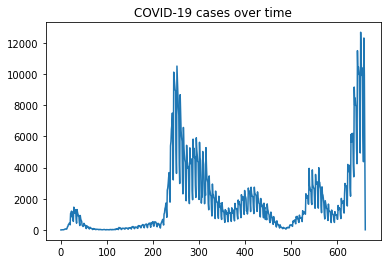

In [29]:
df['cases'].plot(title="COVID-19 cases over time")

#### Outliers

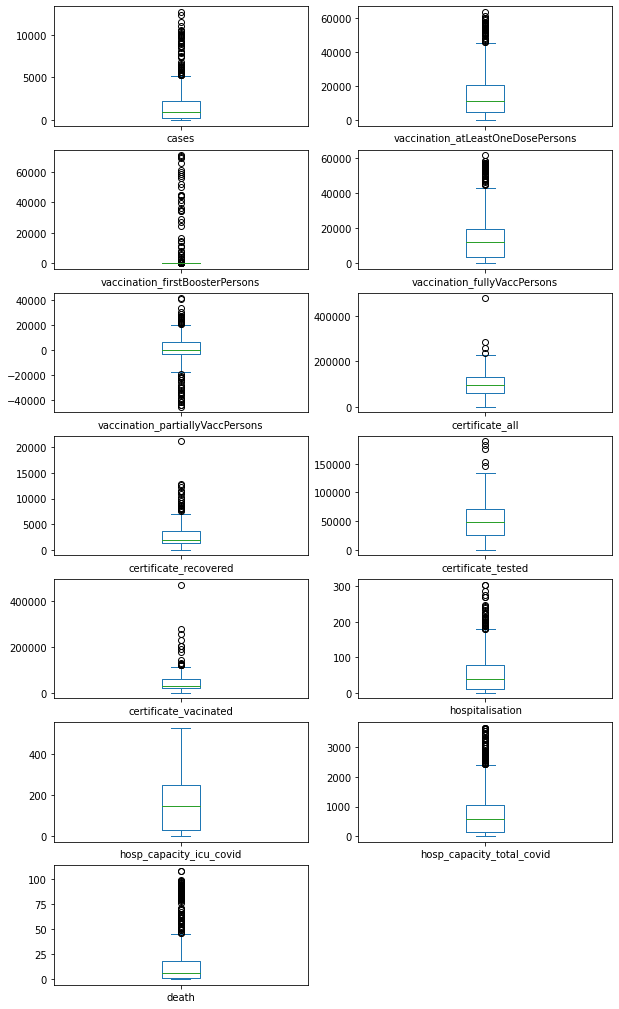

In [28]:
numerical_cols = ['cases',
'vaccination_atLeastOneDosePersons',
'vaccination_firstBoosterPersons',
'vaccination_fullyVaccPersons',
'vaccination_partiallyVaccPersons',
'certificate_all',
'certificate_recovered',
'certificate_tested',
'certificate_vacinated',
'hospitalisation',
'hosp_capacity_icu_covid',
'hosp_capacity_total_covid',
'death'
]

_ = df.loc[:, numerical_cols].plot(kind='box', subplots=True, layout=(7, 2), figsize=(10, 18), sharex=False)

In [ ]:
# TODO: investigate the outliers (certificate_*)

### Correlation Analyse

<AxesSubplot:>

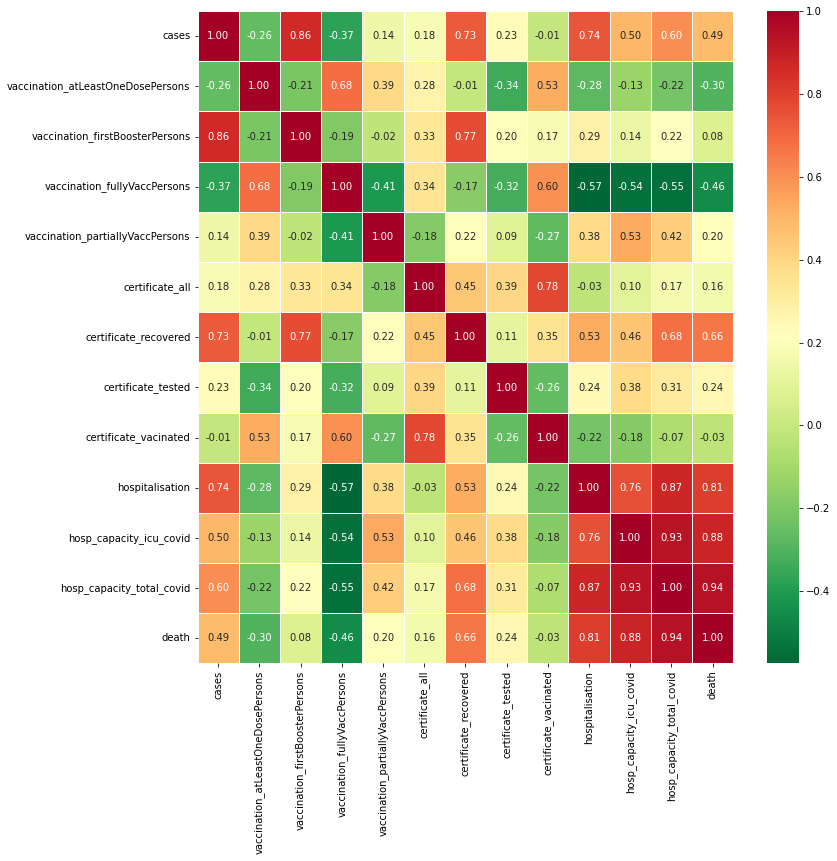

In [26]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn_r', linewidth=0.5, fmt='.2f')

#### Sanity Check

### Splitting (in Trainings- und Testdaten)